## 일요일을 제거하고 토요일 진료 방문자 수 조정

In [2]:
import matplotlib.pyplot as plt      #시각화를 위한 설치
import matplotlib.font_manager as fm    # 한글 폰트
import matplotlib                   #시각화를 위한 설치
import os, warnings  
import pandas as pd                #구조 변경 및 결합을 하기 위한 설치
import seaborn as sns              #시각화를 위한 설치
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)         #모든 행을 다 보여주라는 명령
pd.set_option('display.max_columns', None)      #모든 열을 다 보여주라는 명령

In [3]:
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False
## 한글 폰트 적용 ( 안하면 한글 깨짐 )
f_name = fm.FontProperties(fname="C:/Windows/Fonts/malgunbd.ttf").get_name()
plt.rc('font', family=f_name)

In [56]:
all= pd.read_csv('all.csv')

In [57]:
all['index1'] = all.index

### 일요일 제거

In [12]:
all=all.drop([118,72,73,74,60,112,105,98,91,78,71,64,57,50,43,36,1,8,15,22,29])

In [13]:
all.CNT.mean()

143.09183673469389

### 주말을 빼고 평일들의 평균을 구함.

In [58]:
all=all.drop([118,72,73,74,60,112,105,98,91,78,71,64,57,50,43,36,1,8,15,22,29,113,106,99,92,85,79,65,58,51,44,37,30,23,16,9,2])
all.CNT.mean()

147.109756097561

### 토요일을 1.2배? > 주말을 뺀 평일들의 평균과 토요일의 어떠한 값을 곱하고 난후의 평균을 같게 만들었습니다.)

In [17]:
prod_list =  [113,106,99,92,85,79,65,58,51,44,37,30,23,16,9,2]
all.loc[all['index1'].isin(prod_list), 'CNT'] *= 1.2

In [18]:
all.CNT.mean()

147.109756097561

In [59]:
all=all.loc[:,['ACCOUNTDATE','CNT']]

In [60]:
train=all[(all['ACCOUNTDATE']>='2018-01-02')&(all['ACCOUNTDATE']<='2018-03-30')]
test=all[(all['ACCOUNTDATE']>='2018-04-02')&(all['ACCOUNTDATE']<='2018-04-30')]

In [61]:
train['ACCOUNTDATE']=train['ACCOUNTDATE'].astype('str')
train['ACCOUNTDATE']=pd.to_datetime(train['ACCOUNTDATE'])
train.index=train['ACCOUNTDATE']
train.set_index('ACCOUNTDATE',inplace=True)

In [62]:
train=train[::-1]

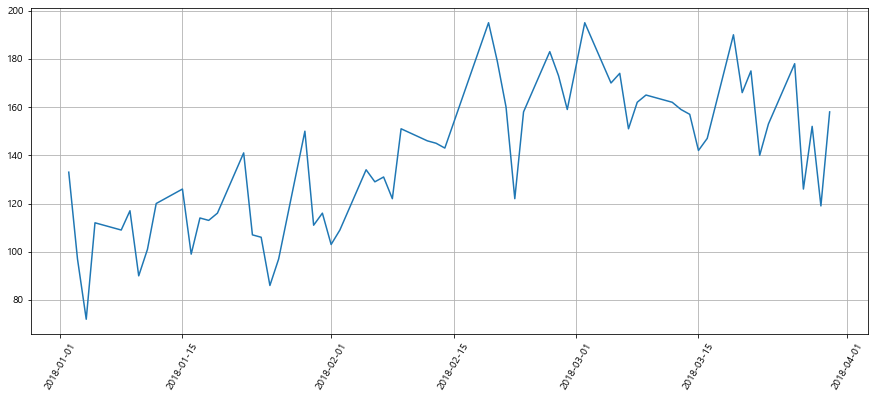

In [65]:
# AD-Fuller Test : 시계열의 정상성(stationary) 한지 확인

from statsmodels.tsa.stattools import adfuller
y = train['CNT']
y_1diff = train.diff().dropna()['CNT']
result = adfuller(y)
print(f'원 데이터 ADF Statistic: {result[0]:.3f}')
print(f'원 데이터 p-value: {result[1]:.3f}')
result = adfuller(y_1diff)
print(f'1차 차분 ADF Statistic: {result[0]:.3f}')
print(f'1차 차분 p-value: {result[1]:.3f}')

원 데이터 ADF Statistic: -1.418
원 데이터 p-value: 0.574
1차 차분 ADF Statistic: -7.589
1차 차분 p-value: 0.000


In [68]:
import itertools
p=d=q=range(0,5)
pdq=list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [69]:
import warnings
warnings.filterwarnings('ignore')

for param in pdq:
    try:
        model_arima=ARIMA(train.CNT.values, order=param)
        model_arima_fit=model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

In [168]:
pip install statsmodels 

Note: you may need to restart the kernel to use updated packages.


In [70]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [71]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

#(ar=4,차분=1, ma=3)파라미터로 arima모델을 학습
model=ARIMA(train['CNT'], order=(4,1,3))
model_fit=model.fit(trend='nc',full_output=True,disp=1)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                  D.CNT   No. Observations:                   60
Model:                 ARIMA(4, 1, 3)   Log Likelihood                -255.974
Method:                       css-mle   S.D. of innovations             16.818
Date:                Mon, 08 Nov 2021   AIC                            527.949
Time:                        15:01:12   BIC                            544.704
Sample:                             1   HQIC                           534.503
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
ar.L1.D.CNT    -0.9642      0.273     -3.526      0.000      -1.500      -0.428
ar.L2.D.CNT    -1.0934      0.228     -4.786      0.000      -1.541      -0.646
ar.L3.D.CNT    -0.6945      0.244     -2.852    

<AxesSubplot:xlabel='ACCOUNTDATE'>

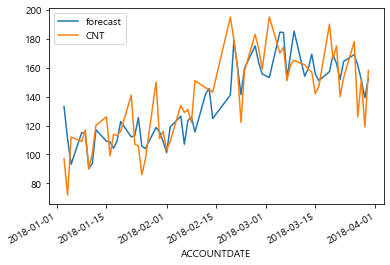

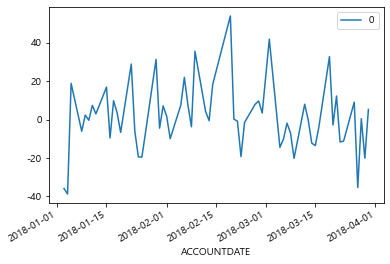

In [72]:
fig=model_fit.plot_predict()
residuals=pd.DataFrame(model_fit.resid)
residuals.plot()

In [73]:
forecast_data=model_fit.forecast(steps=25) 

pred_y=forecast_data[0].tolist()
test_y=test.CNT.values 

In [74]:
pred_y

[153.30655024898473,
 136.1711961429852,
 143.83037500741457,
 140.77352904668982,
 149.3727286677827,
 146.86667712969833,
 138.5339114010457,
 144.72160086368572,
 145.71130288038083,
 144.91348945969872,
 144.07815334543923,
 142.2655826541416,
 145.03242588688605,
 145.28796055212186,
 143.65346661030014,
 143.84968077578804,
 144.0168088980292,
 144.66048164624902,
 144.46125255532237,
 143.7446030744996,
 144.1307345227108,
 144.38878168035612,
 144.30571266583436,
 144.16014213270074,
 144.03720772943342]

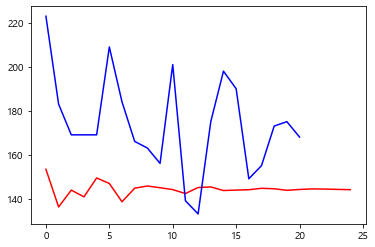

In [75]:
plt.plot(pred_y,color='red',label='예측값') #에측값
plt.plot(test_y,color='blue',label='실제값') #실제값

In [76]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
 
mean_absolute_error(pred_y,test_y)

ValueError: Found input variables with inconsistent numbers of samples: [25, 21]

# --------------------------------------------------------------------------------------------------------------

### Prophet 적용하기

In [42]:
from fbprophet import Prophet

In [52]:
train.columns=['ds','y']
test.columns=['ds','y']

In [53]:
train['ds']= pd.to_datetime(train['ds'])

In [54]:
prophet = Prophet(seasonality_mode = 'multiplicative',
                 daily_seasonality=True,  #일단위의 경향성을 예측할 것이다.(년단위면 yearly_seasonality)
                 changepoint_prior_scale=0.5)
prophet.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [55]:
future_data = prophet.make_future_dataframe(periods = 25, freq = 'd')
forecast_data = prophet.predict(future_data)
a=forecast_data[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(25)

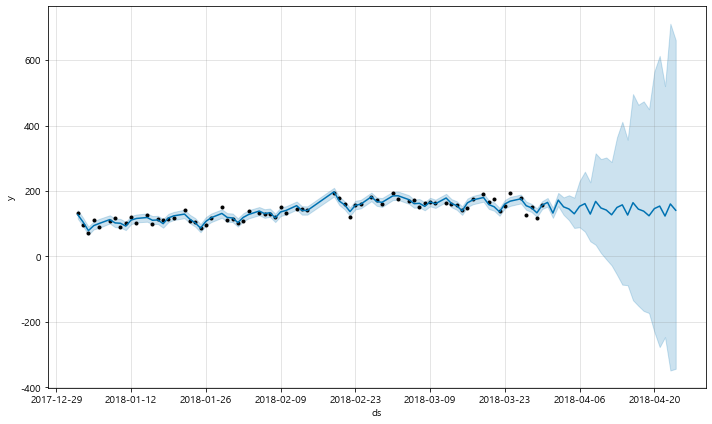

In [57]:
fig1=prophet.plot(forecast_data)

In [58]:
pred_y=a.yhat.values[0:25]
test_y=test.y.values[0:25]

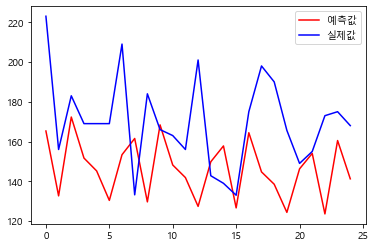

In [59]:
plt.plot(pred_y,color='red',label='예측값') #에측값
plt.plot(test_y,color='blue',label='실제값') #실제값
plt.legend()

- mae값이 줄었음

In [60]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
 
mean_absolute_error(pred_y,test_y) #평균 절대 오차(MAE) 는 모든 절대 오차의 평균

27.90796387263797